### Problem Statement:
    Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

    Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

    Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

### Machine Learning Steps:
    1.Define required libraries with which the model will optmised.
    2.Data Cleansing and Wrangling.
    3.Feature Engineering
    4.Data pre-processing
    5.Feature selection
    6.Split the data into training and testing
    7.Model selection
    8.Model validation
    9.Interpret the results

### Define the required libraries

In [132]:
#as of now we will import pandas, numpy library and the remainig will be downloaded at the time of theie requirement
import pandas as pd
import numpy as np

### loading the data set

In [133]:
data=pd.read_csv('customerchurn.csv')

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### observations:
    1.there are  fields in the data set
    2.each field has the maximum entries of 7043
    3.no null values are present in the data
    4.one column has float data type, 2 int data types and 18 string data types are present in the data set.
    5.customer ID is a unique value column which is no imppact on target column we can drop it
    

In [135]:
data.drop(['customerID'],axis=1,inplace=True)

In [166]:
# placing the data into a dataframe
ccd=pd.DataFrame(data)

In [167]:
ccd.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


#### As my data is clean and no more columns to drop as of now we are going to do the further analysis on data

### Exploratory Data Analysis(EDA)

#### statistical analysis

In [168]:
ccd.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.0,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,2,2.0,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,0.0,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3555,5901.0,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2279.734304,NaN
std,NaN,NaN,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.794470,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,398.550000,NaN
50%,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1394.550000,NaN
75%,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


### observaions:
    1.Gender fileds has 2 types with Male counts as highest recorded
    2.senior citizen has 2 class 
    3.partner column has leading value of No with 4933 count
    4.tenure column has mean 32.37 where as median is 29 which means there are outliers in the data
    5.multiple lines are leading with no with 3390 count
    6.internet service is of 3 types in which the fiber optics are highly recorded
    7.online security with no has leading with 3498 out of 3 classes
    8.Device protection, Tech Support, streamingTV,StreamingMovies, contrct has three classes
    9.paper less bill has 2 catogories, payment method has 4 types
    10.monthly charges column has mean 64.76 less than the median which means there are outliers in this filed also
    

In [169]:
ccd['TotalCharges']=ccd['TotalCharges'].astype(str)

In [170]:
ccd['TotalCharges'].replace(' ','0',inplace=True)

In [171]:
ccd['TotalCharges'].value_counts()

0.0        11
20.2       11
19.75       9
19.9        8
19.65       8
           ..
3687.85     1
266.6       1
1617.5      1
105.5       1
5841.35     1
Name: TotalCharges, Length: 6531, dtype: int64

In [172]:
ccd['TotalCharges']=pd.to_numeric(ccd['TotalCharges'])

In [173]:
ccd['SeniorCitizen']=ccd['SeniorCitizen'].astype('object')

In [174]:
ccd['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [175]:
ccd['SeniorCitizen'].describe()

count     7043
unique       2
top          0
freq      5901
Name: SeniorCitizen, dtype: int64

this total charges column has high std almost the mean and std are equal and the difference between the mean and median is very high

#### Visual or Graphical Analysis

In [176]:
# importing the required libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [177]:
l1=[]
l2=[]
for i in ccd.columns:
    if ccd[i].dtype==object:
        l1.append(i)
    else:
        l2.append(i)

array([[<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>]], dtype=object)

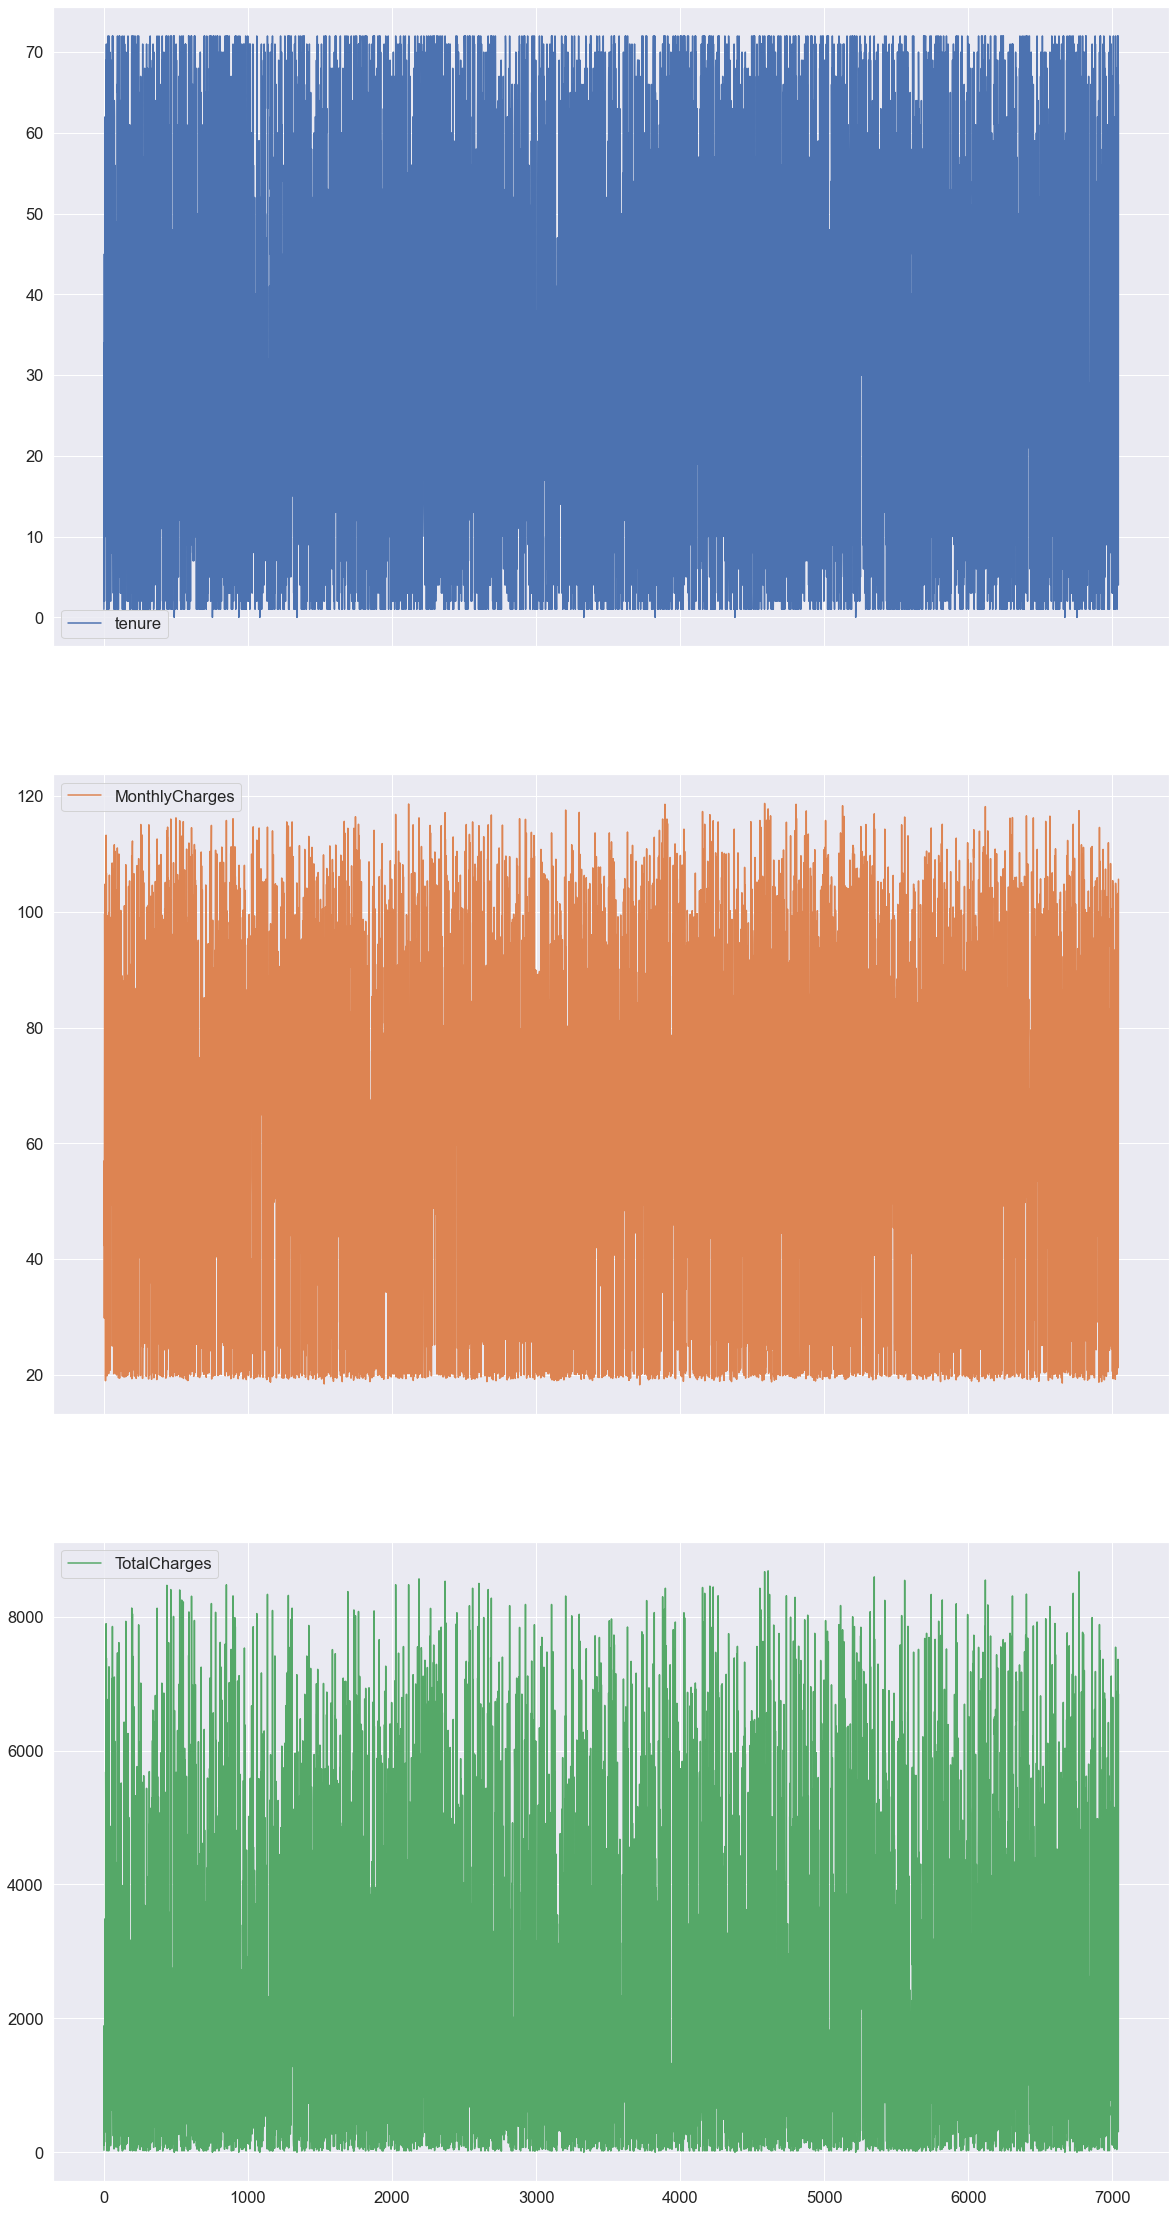

In [178]:
ccd[l2].plot(kind='line',subplots=True, figsize=(20,40),layout=(3,1))

#### observations:
    1.tenure is in range of 10 to 75 months
    2.monthly charges are in range of 20 to 115
    3.total charges are in range of 0 to 8500

In [179]:
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid',palette='deep',font_scale=1.5)

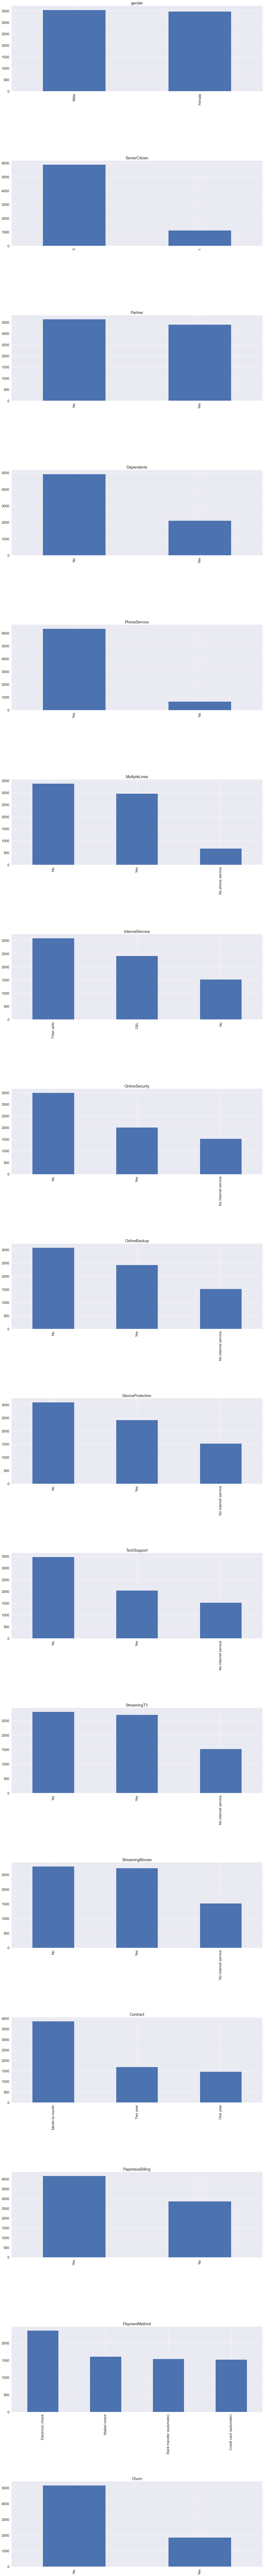

In [180]:
c=1
plt.figure(figsize=(20,200))
for i in ccd.columns:
    plt.subplot(20,1,c)
    if ccd[i].dtype==object:
        plt.title(i)
        ccd[i].value_counts().plot.bar()
        c=c+1
    plt.tight_layout(pad=6.0)
    
plt.show()

### observations:
    1.Gender category leading with the male coount
    2.senior citizens are less in the data
    3.people with out partners are high in the collected data
    4.dependents with no are more in the data set
    5.collected data mainly focuse on the people with phone service
    6.multiple lines services are not preferred by most of the people
    7.optic fiber internet was the high preferred network
    8.people are not interested in taking the online security compared to people with online security
    9.device, tech support protection were taken by very less customers
    10.people streaming tv and movies wiht the internet are high compared to streaming tv and movies
    11.month to month contract was preferred one.
    12.online billing with electronic check is the most easiest was of pay the bill
    13.churn count of no is high compared to yes

#### checking the outliers in the numeric data

SeniorCitizen      AxesSubplot(0.125,0.71587;0.775x0.16413)
tenure            AxesSubplot(0.125,0.518913;0.775x0.16413)
MonthlyCharges    AxesSubplot(0.125,0.321957;0.775x0.16413)
TotalCharges         AxesSubplot(0.125,0.125;0.775x0.16413)
dtype: object

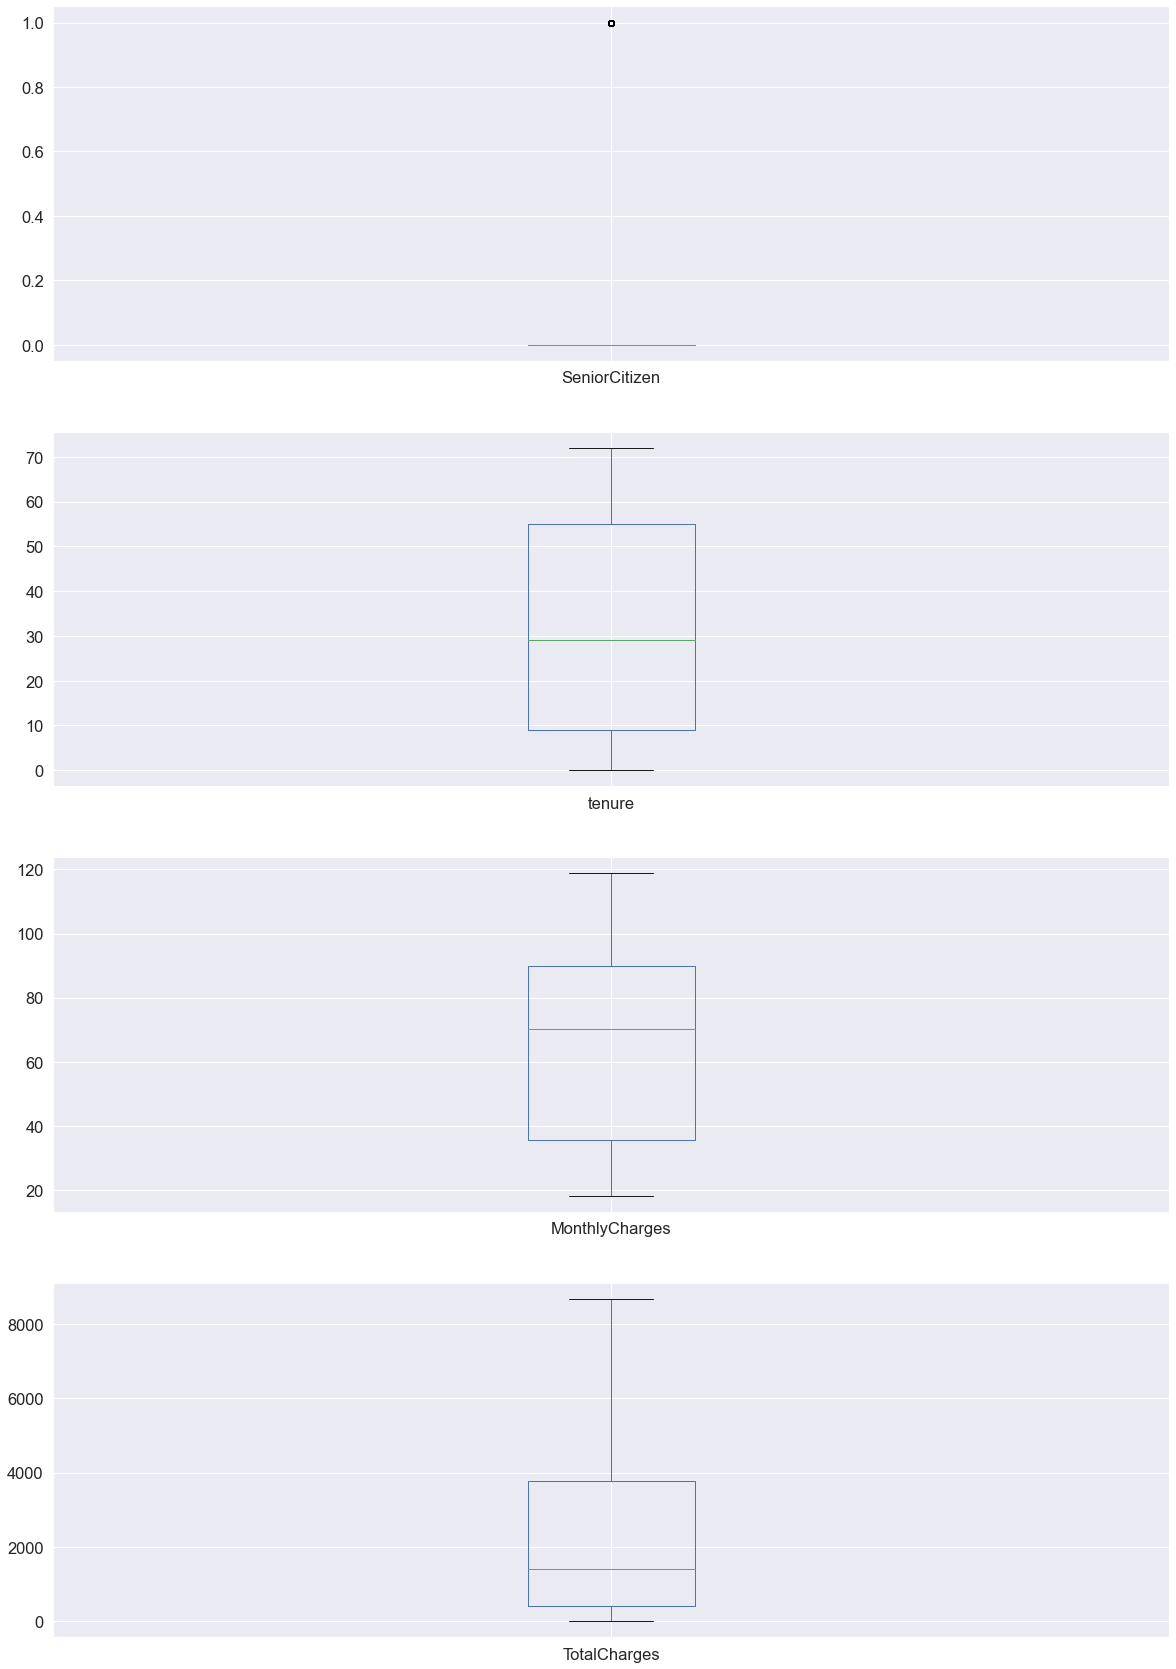

In [181]:
ccd.plot(kind='box',subplots=True, layout=(4,1),figsize=(20,30))

No outliers are present in the data

#### checking for skewness

In [182]:
ccd.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963235
dtype: float64

in the numeric data Total charges has the skewness we can reduce it 

In [183]:
#importing the required libraries
from scipy.stats import boxcox 
from sklearn.preprocessing import power_transform

In [184]:
d=np.array(ccd['TotalCharges'])
ccd['TotalCharges']=power_transform(d.reshape(-1,1),method='yeo-johnson')

In [185]:
ccd.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges     -0.146121
dtype: float64

we can see that the skewness was reduced in the numeric data

### Scaling

Reducing the magnitude of numeric data is called scaling

In [186]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [189]:

scale=StandardScaler()
for i in ccd.columns:
    if ccd[i].dtype!=object:
        d=np.array(ccd[i])
        scale.fit(d.reshape(-1,1))
        ccd[i]=scale.transform(d.reshape(-1,1))
    

#### converting the string data ot numeric by encoding technique

In [190]:
# by using lable encoders
# importing the encoders from the sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lb=LabelEncoder()
for i in ccd.columns:
    if ccd[i].dtype==object:
        ccd[i]=lb.fit_transform(ccd[i])

In [191]:
ccd.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-1.792996,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,0.254809,0


### splitting the Data to future variables and target variable

In [192]:
x=ccd.iloc[:,0:-1]
y=ccd.iloc[:,-1]

### balancing the data set

In [194]:
x.shape,y.shape,y.value_counts()# before the balancing of data set

((7043, 19),
 (7043,),
 0    5174
 1    1869
 Name: Churn, dtype: int64)

In [195]:
# importing the required library
from imblearn.over_sampling import SMOTE
x, y = SMOTE().fit_resample(x, y)

In [196]:
x.shape,y.shape,y.value_counts()# after the balancing of data set

((10348, 19),
 (10348,),
 0    5174
 1    5174
 Name: Churn, dtype: int64)

### Hyper Perameter Tuning

In [197]:
# importing the required libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
lr,rf,ac,dt=LogisticRegression(),RandomForestClassifier(),AdaBoostClassifier(),DecisionTreeClassifier()

In [198]:
#creating perameters
model_par={
           lr:{'model':lr,'param':{'penalty':['l1', 'l2', 'elasticnet', 'none'],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}},
    rf:{'model':rf,'param':{'n_estimators':[100,125,150,200],'criterion':["gini", "entropy"],'min_samples_split':[2,2.5,3,3.5]}},
    ac:{'model':ac,'param':{'n_estimators':[50,100,150,200],'learning_rate':[1,2,3,4],'algorithm':['SAMME', 'SAMME.R']}},
    dt:{'model':dt,'param':{'criterion':["gini", "entropy"],'splitter':['best','random'],'min_samples_leaf':[1,2,3]}}
           }
scores=[]
for model_name, mp in model_par.items():
    model_selection=GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(x,y)
    scores.append({'model':model_name,'best_score':model_selection.best_score_,'best_params':model_selection.best_params_})
scores

[{'model': LogisticRegression(),
  'best_score': 0.7802505819750025,
  'best_params': {'penalty': 'l2', 'solver': 'liblinear'}},
 {'model': RandomForestClassifier(),
  'best_score': 0.8384294963843999,
  'best_params': {'criterion': 'entropy',
   'min_samples_split': 3,
   'n_estimators': 100}},
 {'model': AdaBoostClassifier(),
  'best_score': 0.7934906592136508,
  'best_params': {'algorithm': 'SAMME.R',
   'learning_rate': 1,
   'n_estimators': 200}},
 {'model': DecisionTreeClassifier(),
  'best_score': 0.7803486012753249,
  'best_params': {'criterion': 'entropy',
   'min_samples_leaf': 1,
   'splitter': 'random'}}]

In [199]:
# model selection
# Random FOrest classifier is the best model for this data 
rf=RandomForestClassifier(criterion='entropy',min_samples_split=3)

the model performs best at random state 36
test accuracy_score of 0.943317230273752
test roc_auc_score of 0.9807307205543683
train accuracy_score of 0.9475355515670303
train roc_auc_score of 0.9825150004315685
cross validation score 83.40779586045385
confusion_matrix of 
 [[1429  106]
 [  70 1500]]
classification_report of 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      1535
           1       0.93      0.96      0.94      1570

    accuracy                           0.94      3105
   macro avg       0.94      0.94      0.94      3105
weighted avg       0.94      0.94      0.94      3105



Text(0.5, 1.0, 'ROC Curve')

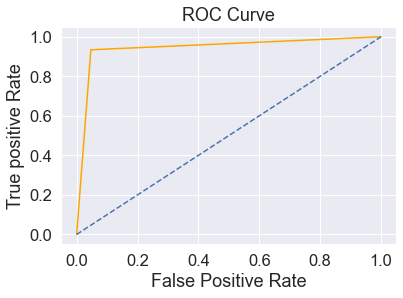

In [200]:
# model tuning
tep,trp,I=[],[],[]
for i in range(1,50):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3, random_state=i)
    rf.fit(xtrain,ytrain)
    test_pre=rf.predict(xtest)
    train_pre=rf.predict(xtrain)
    Tep=accuracy_score(ytest,test_pre)
    Trp=accuracy_score(ytrain,train_pre)
    Cv=cross_val_score(rf,x,y,cv=3).mean()*100
    tep.append(Tep)
    trp.append(Trp)
    I.append(i)
    
values=pd.DataFrame({'Test_acc':tep,'Train_acc':trp,'random_state':I})
values.sort_values(by='Test_acc',inplace=True,ignore_index=True)
print('the model performs best at random state',values.iloc[0,2])
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3, random_state=values.iloc[0,2])
test_pre=rf.predict(xtest)
train_pre=rf.predict(xtrain)
test_pre_prob=rf.predict_proba(xtest)
train_pre_prob=rf.predict_proba(xtrain)
print("test accuracy_score of",accuracy_score(ytest,test_pre))
print("test roc_auc_score of", roc_auc_score(ytest,test_pre_prob[:,1]))
print("train accuracy_score of",accuracy_score(ytrain,train_pre))
print("train roc_auc_score of", roc_auc_score(ytrain,train_pre_prob[:,1]))
print("cross validation score", cross_val_score(rf,x,y,cv=3).mean()*100)
print("confusion_matrix of",'\n', confusion_matrix(ytest,test_pre))
print("classification_report of",'\n',classification_report(ytest,test_pre))
fpr,tpr,tr=roc_curve(test_pre, ytest)
plt.plot(fpr,tpr,color='orange')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True positive Rate")
plt.title("ROC Curve")

In [201]:
### Model saving
import pickle
filename='customer_churn_analysis.pkl'
pickle.dump(rf,open(filename,'wb'))